# Objective 
The objective is to build a model that  detects the emotion hidden in the text comments. The emotons include happiness,sadness,worry, love etc.,

In [ ]:
import pandas as pd
# !pip install nltk
# !pip install spacy

In [ ]:
import nltk
import spacy
# nltk.download("all")

# Step 1)  Import the data

Get the dataset information and print few sample records

Dataset location - https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Final_Emotion_Data/Final_Emotion_Data.csv

In [ ]:
# emotion_data = pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Final_Emotion_Data/Final_Emotion_Data.csv")

# Uploaded the file to my Github account and using it
emotion_data1 = pd.read_csv("https://raw.githubusercontent.com/A-Bhanupratap/ML_data_files/main/Emotion_Detection/Final_Emotion_Data.csv")

In [ ]:
# print(emotion_data.shape)
print(emotion_data1.shape)
print(emotion_data1.info)

(56000, 3)
<bound method DataFrame.info of           Id    Emotion                                               Text
0          1      anger   im grabbing a minute to post i feel greedy wrong
1          1    sadness                            i didnt feel humiliated
2          2    sadness  i can go from feeling so hopeless to so damned...
3          4       love  i am ever feeling nostalgic about the fireplac...
4          5      anger                               i am feeling grouchy
...      ...        ...                                                ...
55995  55996    neutral                                   @JohnLloydTaylor
55996  55997       love                     Happy Mothers Day  All my love
55997  55998       love  Happy Mother's Day to all the mommies out ther...
55998  55999  happiness  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
55999  56000       love  @mopedronin bullet train from tokyo    the gf ...

[56000 rows x 3 columns]>


In [ ]:
emotion_data1.sample(20)

,Id,Emotion,Text
53399,53400,happiness,@jadeofjades www.youtube.com/watch?v=CyJvgnP9-...
48835,48836,neutral,goodnight!!!
51997,51998,worry,These nice boys realized that we were too shor...
40992,40993,neutral,@AllisonNazarian oof. perhaps it's time to sta...
30838,30839,sadness,@sheistheemily pq vc nÃ¯Â¿Â½o pediu amor
35825,35826,worry,But then again I think I'm the only who pays a...
54415,54416,neutral,@verwon Thanks for sharing it. Anything about ...
28686,28687,happiness,"omds! holly steel, bless her! x"
9133,9134,happiness,i pray every day for our little ones to feel s...
13200,13201,fear,im feeling afraid


# Step 2)  Get the unique list of emotions and their frequency counts.

In [ ]:
print(emotion_data1['Emotion'].value_counts())

cnt_arr = emotion_data1['Emotion'].unique()
print('Number of emotions = ' + str(len(cnt_arr)))

happiness     10571
sadness        9831
neutral        8638
worry          8459
love           5146
surprise       2759
anger          2269
fear           1937
fun            1776
relief         1526
hate           1323
empty           827
enthusiasm      759
boredom         179
Name: Emotion, dtype: int64
Number of emotions = 14


# Step 3)  Text Preprocessing

Use a single function to perform all the pre-processing in one step. 

You need to take care of 


1. Expanded forms
2. Stopwords
3. Regular Expressions
4. Lemmatization 




In [ ]:
# Dictionary for Expanded Forms
contra_Expan_Dict = {"ain`t": "am not","aren`t": "are not","can`t": "cannot","can`t`ve": "cannot have","`cause": "because",
"could`ve": "could have","couldn`t": "could not","couldn`t`ve": "could not have","didn`t": "did not",
"doesn`t": "does not","don`t": "do not","hadn`t": "had not","hadn`t`ve": "had not have","hasn`t": "has not",
"haven`t": "have not","he`d": "he would","he`d`ve": "he would have","he`ll": "he will","he`ll`ve": "he will have",
"he`s": "he is","how`d": "how did","how`d`y": "how do you","how`ll": "how will",
"how`s": "how does","i`d": "i would","i`d`ve": "i would have","i`ll": "i will","i`ll`ve": "i will have","i`m": "i am",
"i`ve": "i have","isn`t": "is not","it`d": "it would","it`d`ve": "it would have","it`ll": "it will","it`ll`ve": "it will have",
"it`s": "it is","let`s": "let us","ma`am": "madam","mayn`t": "may not","might`ve": "might have","mightn`t": "might not",
"mightn`t`ve": "might not have","must`ve": "must have","mustn`t": "must not","mustn`t`ve": "must not have","needn`t": "need not","needn`t`ve": "need not have",
"o`clock": "of the clock","oughtn`t": "ought not","oughtn`t`ve": "ought not have","shan`t": "shall not",
"sha`n`t": "shall not","shan`t`ve": "shall not have","she`d": "she would",
"she`d`ve": "she would have","she`ll": "she will","she`ll`ve": "she will have",
"she`s": "she is","should`ve": "should have","shouldn`t": "should not","shouldn`t`ve": "should not have","so`ve": "so have","so`s": "so is",
"that`d": "that would","that`d`ve": "that would have","that`s": "that is","there`d": "there would","there`d`ve": "there would have","there`s": "there is",
"they`d": "they would","they`d`ve": "they would have","they`ll": "they will","they`ll`ve": "they will have","they`re": "they are","they`ve": "they have",
"to`ve": "to have","wasn`t": "was not"," u ": " you "," ur ": " your "," n ": " and ","won`t": "would not",
"dis": "this","bak": "back","brng": "bring", "hrs":"hours"}

# Function to expand the short forms
def expanded_form(x):
  if x in contra_Expan_Dict.keys():
    return(contra_Expan_Dict[x])
  else:
    return(x)

# Updating stop words in spaCy
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
spacy_stopwords.update({"would", "rt","like", "ha", "lol", "need", "do", "wassup", "omg", "m", "oh", "d", "u", "b", "ll", "ill", "amp", "s", "ve"})

# Function for Regular Expression based Cleaning
import re
def clean_with_re(x):
  x=str(x)
  x=re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'," ", x) #Remove URLs
  x=re.sub(r'[^\w ]+', "", x) # Remove Punctuation-1
  x=re.sub(r"[,!@&\'?\.$%_]"," ", x) # Remove Punctuation-2
  x=re.sub(r"\d+"," ", x) #Remove digits
  x=re.sub(r'[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}', "", x) #Remove email addresses
  return(x)

spacy_model = spacy.load('en_core_web_sm')

# Single Function for Preprocessing

def pre_processing(input_data, text_col):
  input_data["text_col_clean"]=input_data[text_col].apply(lambda x:str(x).lower())
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[expanded_form(t) for t in str(x).split()])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:clean_with_re(x))
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:" ".join([t.lemma_ for t in spacy_model(str(x))if t.lemma_ !="-PRON-" ]))
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[t for t in str(x).split() if t not in spacy_stopwords ])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x: " ".join(x) )
  print(input_data[[text_col,"text_col_clean"]])

In [ ]:
pre_processing(input_data=emotion_data1, text_col="Text")

                                                    Text  \
0       im grabbing a minute to post i feel greedy wrong   
1                                i didnt feel humiliated   
2      i can go from feeling so hopeless to so damned...   
3      i am ever feeling nostalgic about the fireplac...   
4                                   i am feeling grouchy   
...                                                  ...   
55995                                   @JohnLloydTaylor   
55996                     Happy Mothers Day  All my love   
55997  Happy Mother's Day to all the mommies out ther...   
55998  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...   
55999  @mopedronin bullet train from tokyo    the gf ...   

                                          text_col_clean  
0                   I grab minute post feel greedy wrong  
1                                         feel humiliate  
2                  feel hopeless damn hopeful care awake  
3                 feel nostalgic fireplace 

In [ ]:
emotion_data1

,Id,Emotion,Text,text_col_clean
0,1,anger,im grabbing a minute to post i feel greedy wrong,I grab minute post feel greedy wrong
1,1,sadness,i didnt feel humiliated,feel humiliate
2,2,sadness,i can go from feeling so hopeless to so damned...,feel hopeless damn hopeful care awake
3,4,love,i am ever feeling nostalgic about the fireplac...,feel nostalgic fireplace know property
4,5,anger,i am feeling grouchy,feel grouchy
...,...,...,...,...
55995,55996,neutral,@JohnLloydTaylor,johnlloydtaylor
55996,55997,love,Happy Mothers Day All my love,happy mother day love
55997,55998,love,Happy Mother's Day to all the mommies out ther...,happy mother day mommy woman man long momma day
55998,55999,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,niariley beautiful follow I peep new hit singl...


# Step 4)  Create a word cloud and generate atleast two visualizations to highlight the most frequent words

Try different colour themes

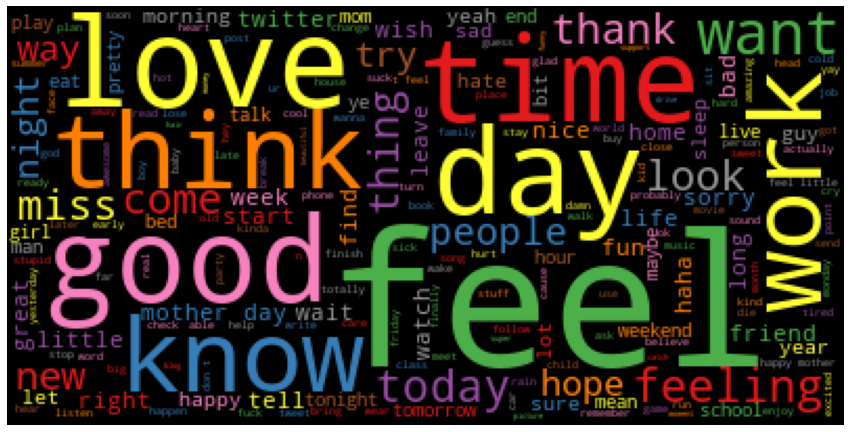

In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

final_text= "".join(emotion_data1["text_col_clean"])
len(final_text)

plt.figure(figsize = (15, 15), facecolor = None) 
wc=WordCloud(colormap='Set1').generate(final_text)
plt.imshow(wc)
plt.axis("off")
plt.show()

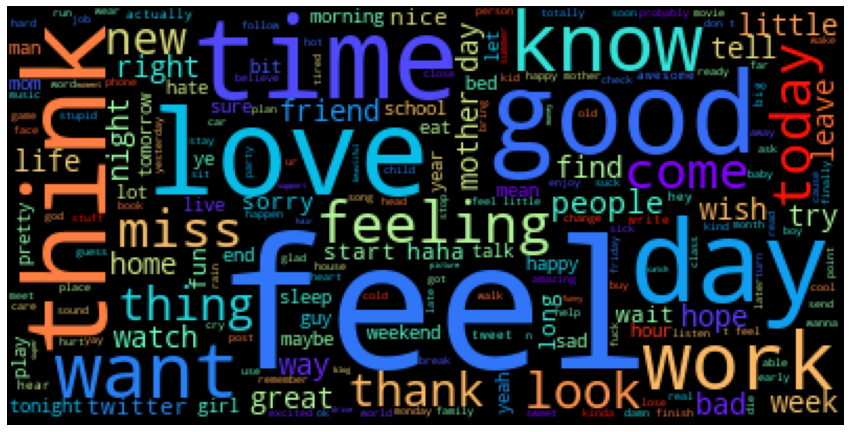

In [ ]:
%matplotlib inline

final_text="".join(emotion_data1["text_col_clean"])
len(final_text)

plt.figure(figsize = (15, 15), facecolor = None) 
wc=WordCloud(colormap='rainbow', background_color="black").generate(final_text)
plt.imshow(wc)
plt.axis("off")
plt.show()

# Step 5)  Create a document term matrix. Keep the minimum frequency between  5 to 20. 


Note: If there are any missing values in the cleaned column. You need to drop the missing values before creating DTM

In [ ]:
# emotion_data1[emotion_data1['text_col_clean'].isnull()==True]

emotion_data1.info()
# No null values in cleaned data column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              56000 non-null  int64 
 1   Emotion         56000 non-null  object
 2   Text            56000 non-null  object
 3   text_col_clean  56000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer(min_df= 6) # mindf = 5: 6373, 6: 5523, 7: 4883
dtm_v1 = pd.DataFrame(countvec1.fit_transform(emotion_data1['text_col_clean']).toarray(), columns=countvec1.get_feature_names_out(), index=None)
print(dtm_v1.shape)
dtm_v1

(56000, 5520)


,aaaah,aah,aaron,ab,abandon,abby,abc,abide,ability,abit,...,zac,zach,zack,zealand,zero,zoe,zombie,zone,zoo,ãââ½
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 6) Build a Naive bayes model

Prepare train and Test data. Build the model and get the accuracy on train and test data

Note- Accuracy will be less


In [ ]:
dtm_v1['emotion_label'] = emotion_data1['Emotion']
dtm_v1['emotion_label'].value_counts()

happiness     10571
sadness        9831
neutral        8638
worry          8459
love           5146
surprise       2759
anger          2269
fear           1937
fun            1776
relief         1526
hate           1323
empty           827
enthusiasm      759
boredom         179
Name: emotion_label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = dtm_v1.drop(['emotion_label'], axis = 1)
y = dtm_v1['emotion_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44800, 5520)
(44800,)
(11200, 5520)
(11200,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
senti_model = MultinomialNB()
#Fitting model to our data
senti_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
print("Train Accuracy", senti_model.score(X_train,y_train))
print("Test Accuracy", senti_model.score(X_test,y_test))

Train Accuracy 0.5374776785714286
Test Accuracy 0.4253571428571429


In [ ]:
#Prediction
pred_sentiment=senti_model.predict(X_test)
print(pred_sentiment)

['worry' 'happiness' 'love' ... 'sadness' 'surprise' 'worry']


# Step 7) Take only two emotions; Re-build the model

Keep only two emotions. Ignore rest of the data while building the model. Keep only happiness and sadness

In [ ]:
dtm_v2 = dtm_v1[dtm_v1['emotion_label'].isin(['happiness','sadness'])]

In [ ]:
print(dtm_v2.shape)
dtm_v2['emotion_label'].value_counts()

(20402, 5521)


happiness    10571
sadness       9831
Name: emotion_label, dtype: int64

In [ ]:
X = dtm_v2.drop(['emotion_label'], axis = 1)
y = dtm_v2['emotion_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16321, 5520)
(16321,)
(4081, 5520)
(4081,)


Build the model and get the confusion matrix and accuracy

In [ ]:
from sklearn.naive_bayes import MultinomialNB
senti_model = MultinomialNB()
#Fitting model to our data
senti_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
print("Train Accuracy", senti_model.score(X_train,y_train))
print("Test Accuracy", senti_model.score(X_test,y_test))

Train Accuracy 0.9039887261809938
Test Accuracy 0.8456260720411664


# Step 8) Write down your final findings. How do you explain this project to a layman?


* Problem Statement 
Classify the text data collected from messages/comments by people into different emotions like happiness, sadness, love, anger etc. Given a text sentence, we have to predict the human emotion expressed by the sentence.

* Overall Approach
1. Preprocessing - Simplifying the words, removing commonly used words and symbols and standardising the format for all the texts.
2. Word cloud and re-cleaning : Finding the most frequently used words and removing non-meaningful words among them.
3. Convert the text data to numerical format for building the model.
4. Split the data into 2 parts in 80-20 ratio : training data (80%) to build the model, and test data(20%) to validate the model.
5. Build the Model (Baive Bayes model). 
6. Get the emotion predictions made by the model and check against the actual emotions data we have to check for accuracy, on both the training data and testing data.
7. We observed that the accuracy on training data is 53% and that on the test data is 42% which is quite low. The reason is that we have 14 different categories of emotions which makes the model learning process complex. hence the error.
8. To simplify things, we just keep the data for two categories - happiness and sadness, and ignore the rest of the categories.
9. Once again, we split the data into training data (80%) and testing data (20%).
10. We build the model once again, this time using hust 2 categories.
11. We get 90% train data accuracy and 84% test data accuracy. This difference of 8% is normal and expected. Since we are dealing with human language, we cannot expect exact same patterns of words and sentences in two different sets of data. Some difference is expected and acceptable.

* Challenges faced
1. Since the data size is large, preprocessing steps, DTM, Train-test datasets, consume a large amount of memory. RAM can crash ans we have to restart from the beginning. I faced RAM crash multiple times.
2. When restarting from the beginning, we don't want to reinstall nltk and other required packages again and again. So I used Jupyter notebook, so that using Anaconda suite I could install the packages to the local machine permanently. Multiple downloads will not be required if the system crashes, saving a lot of time.
3. Pre-processing reduced some words like I'm to I and m. So m became a frequently occuring word. Similarly there were many such non-meaningful words. I was able to detect them using word cloud and remove them by updating spaCy stopwords.

* Accuracy of the final model
Train accuracy = 90%
Test accuracy = 84%
We can consider the final model accuracy as 84%.
